In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Import Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Cleaning

### Informasi umum dataset

In [3]:
pd.set_option("display.max_colwidth",None,"display.max_columns",None)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Identifikasi kolom**

- customerID = Customer ID
- gender = Jenis kelamin
- SeniorCitizen = Apakah pelanggannya adalah warga lanjut usia atau bukan (1, 0)
- Partner = Apakah pelanggan mempunyai pasangan atau tidak (Yes, No)
- Dependents = Apakah pelanggan mempunyai tanggungan atau tidak (Yes, No)
- tenure = Jumlah bulan pelanggan telah tinggal di perusahaan
- PhoneService = Apakah pelanggan memiliki layanan telepon atau tidak (Yes, No)
- MultipleLines = Apakah pelanggan memiliki banyak saluran atau tidak (Yes, No, Tidak ada layanan telepon)
- InternetService = Penyedia layanan internet pelanggan (DSL, Fiber optic, No)
- OnlineSecurity = Apakah pelanggan memiliki keamanan online atau tidak (Yes, No, Tidak ada layanan internet)
- OnlineBackup = Apakah pelanggan memiliki cadangan online atau tidak (Yes, No, Tidak ada layanan internet)
- DeviceProtection = Apakah pelanggan memiliki perlindungan perangkat atau tidak (Yes, No, Tidak ada layanan internet)
- TechProtection = Apakah pelanggan memiliki dukungan teknis atau tidak (Yes, No, Tidak ada layanan internet)
- StreamingTV = Apakah pelanggan memiliki TV streaming atau tidak (Yes, No, Tidak ada layanan internet)
- StreamingMovies = Apakah pelanggan memiliki streaming film atau tidak (Yes, No, Tidak ada layanan internet)
- Contract = Jangka waktu kontrak pelanggan (Month-to-month, One year, Two year)
- PapperlessBilling = Apakah pelanggan memiliki tagihan tanpa kertas atau tidak (Yes, No)
- PaymentMethod = metode pembayaran pelanggan
- MonthlyCharges = Jumlah yang dibebankan kepada pelanggan setiap bulan
- TotalCharges = Jumlah total yang dibebankan kepada pelanggan
- Churn = Apakah pelanggannya churn atau tidak (Yes, No)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
for i in df.columns:
  print(f"Value Counts pada kolom {i} adalah \n{df[i].value_counts()}")
  print("\n")

Value Counts pada kolom customerID adalah 
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


Value Counts pada kolom gender adalah 
gender
Male      3555
Female    3488
Name: count, dtype: int64


Value Counts pada kolom SeniorCitizen adalah 
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Value Counts pada kolom Partner adalah 
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Value Counts pada kolom Dependents adalah 
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Value Counts pada kolom tenure adalah 
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


Value Counts pada kolom PhoneService adalah 
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Valu

**Identifikasi tipe kolom**
- Kategorikal = gender,SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn
- Numerikal kontiniu = customerID, tenure, MonthlyCharges, TotalCharges

In [11]:
Kategorikal = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [12]:
Numerikal = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charge tidak sinkron, jadi kita akan ubah tipe data dari TotalCharges

In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
#df = df.astype({"TotalCharges":float})

ketika mau diubah ke float, katanya ada string kosong, maka dari itu kita ubah string kosong ke Nan

In [16]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', np.nan)

In [17]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [18]:
df["TotalCharges"].isnull().sum()

11

In [19]:
df[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Berhubung baris yang null hanya 11, jadi kita drop baris yang dimana kolom TotalCharges nya null

In [22]:
df.dropna(axis=0,inplace=True)

In [23]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# Handing Duplicat

In [24]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [25]:
df[df["customerID"].duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


tidak ada duplikat baik itu keseluruhan maupun berdasarkan Primary key

# Handling Missing Value

In [26]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### Changes data type

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

TotalCharges harusnya adalah float, maka kita ubah dari type object ke float

In [43]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

tidak ada missing value

# Handling Outlier

In [47]:
Numerikal.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

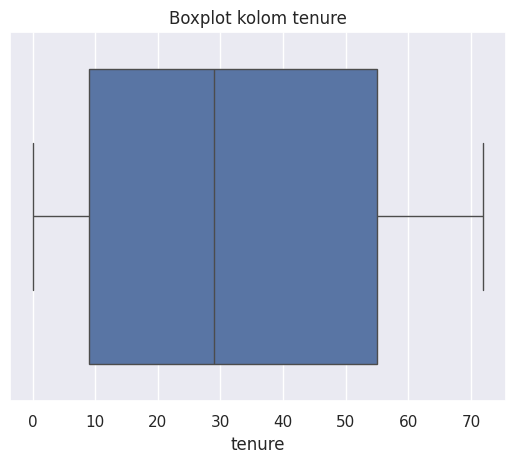

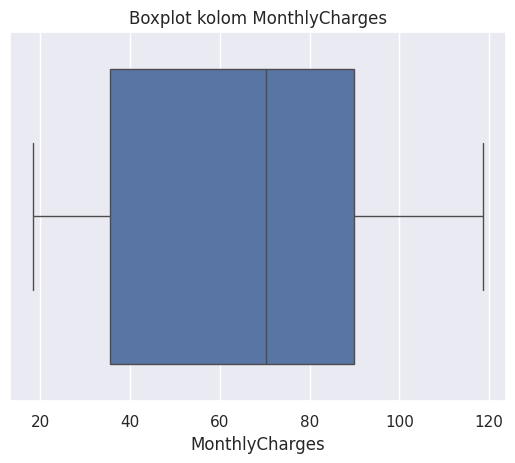

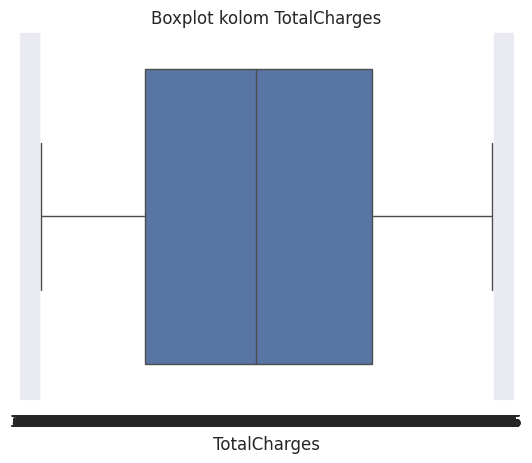

In [45]:
sns.set(style="darkgrid")

for column in Numerikal.columns:
    plt.figure()
    sns.boxplot(x=Numerikal[column])
    plt.title(f"Boxplot kolom {column}")
    plt.show()

tidak ada yang identifikasi outlier oleh boxplot

# Visualisasi

In [28]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
Kategorikal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [30]:
kategorikal2 = Kategorikal[['StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [31]:
kategorikal2.columns

Index(['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], dtype='object')

<ipython-input-32-6dd843e99957>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-32-6dd843e99957>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-32-6dd843e99957>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-32-6dd843e99957>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-32-6dd843e99957>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-32-6dd843e99957>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipy

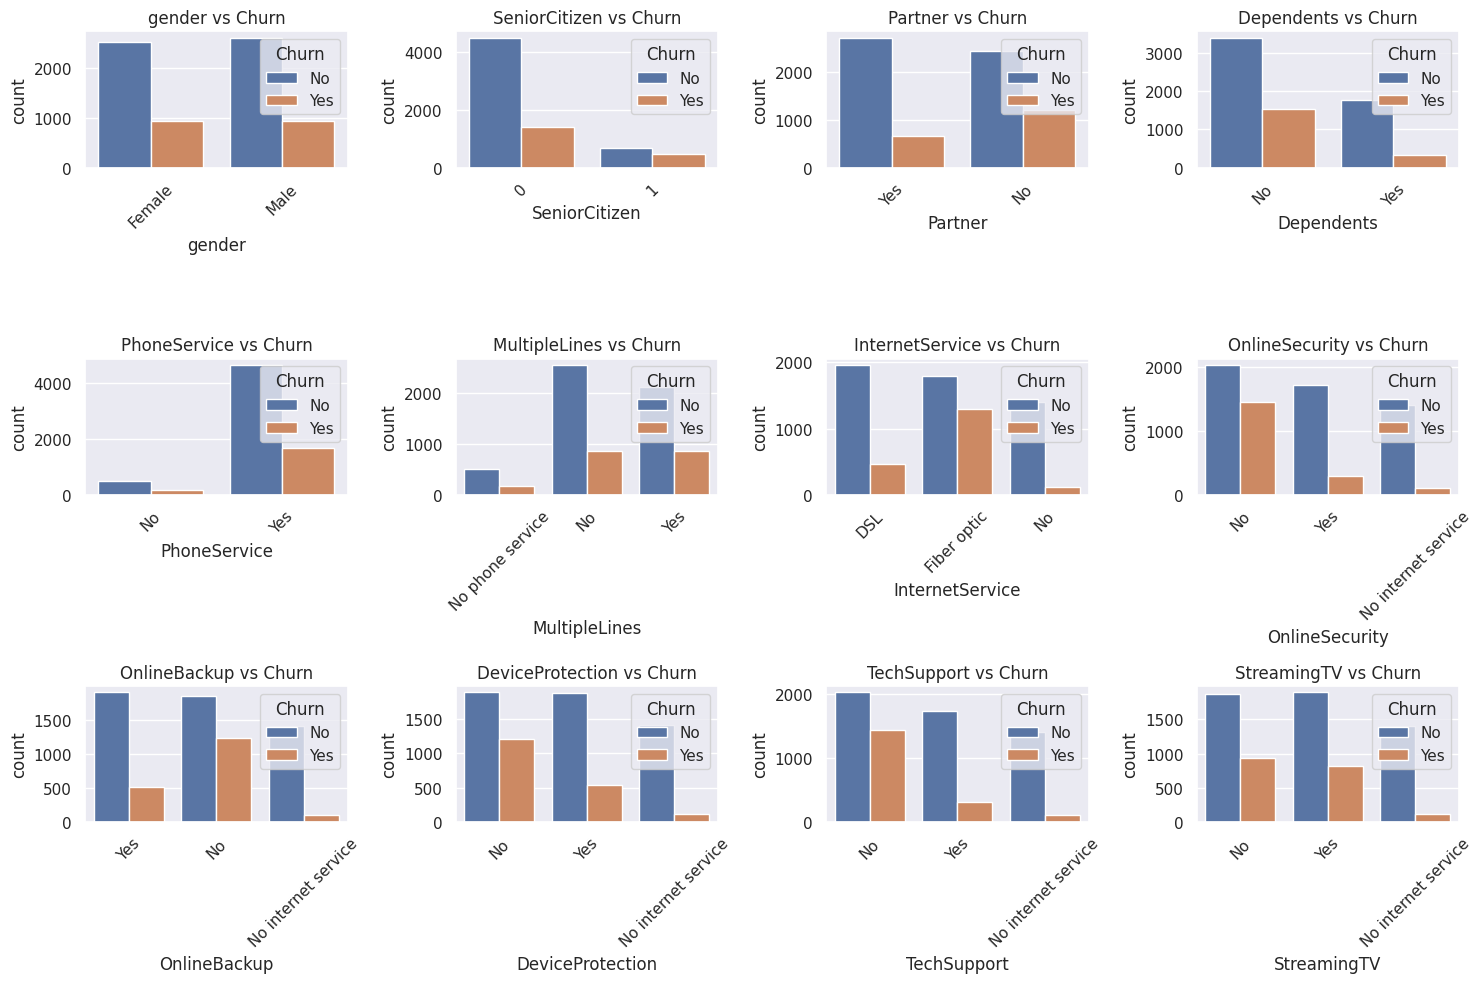

In [32]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

for cat, ax in zip(Kategorikal, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="Churn", ax=ax)
    ax.set_title(f"{cat} vs Churn")
    ax.legend(title="Churn", loc="upper right")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-33-8ce275c19765>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-33-8ce275c19765>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-33-8ce275c19765>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-33-8ce275c19765>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


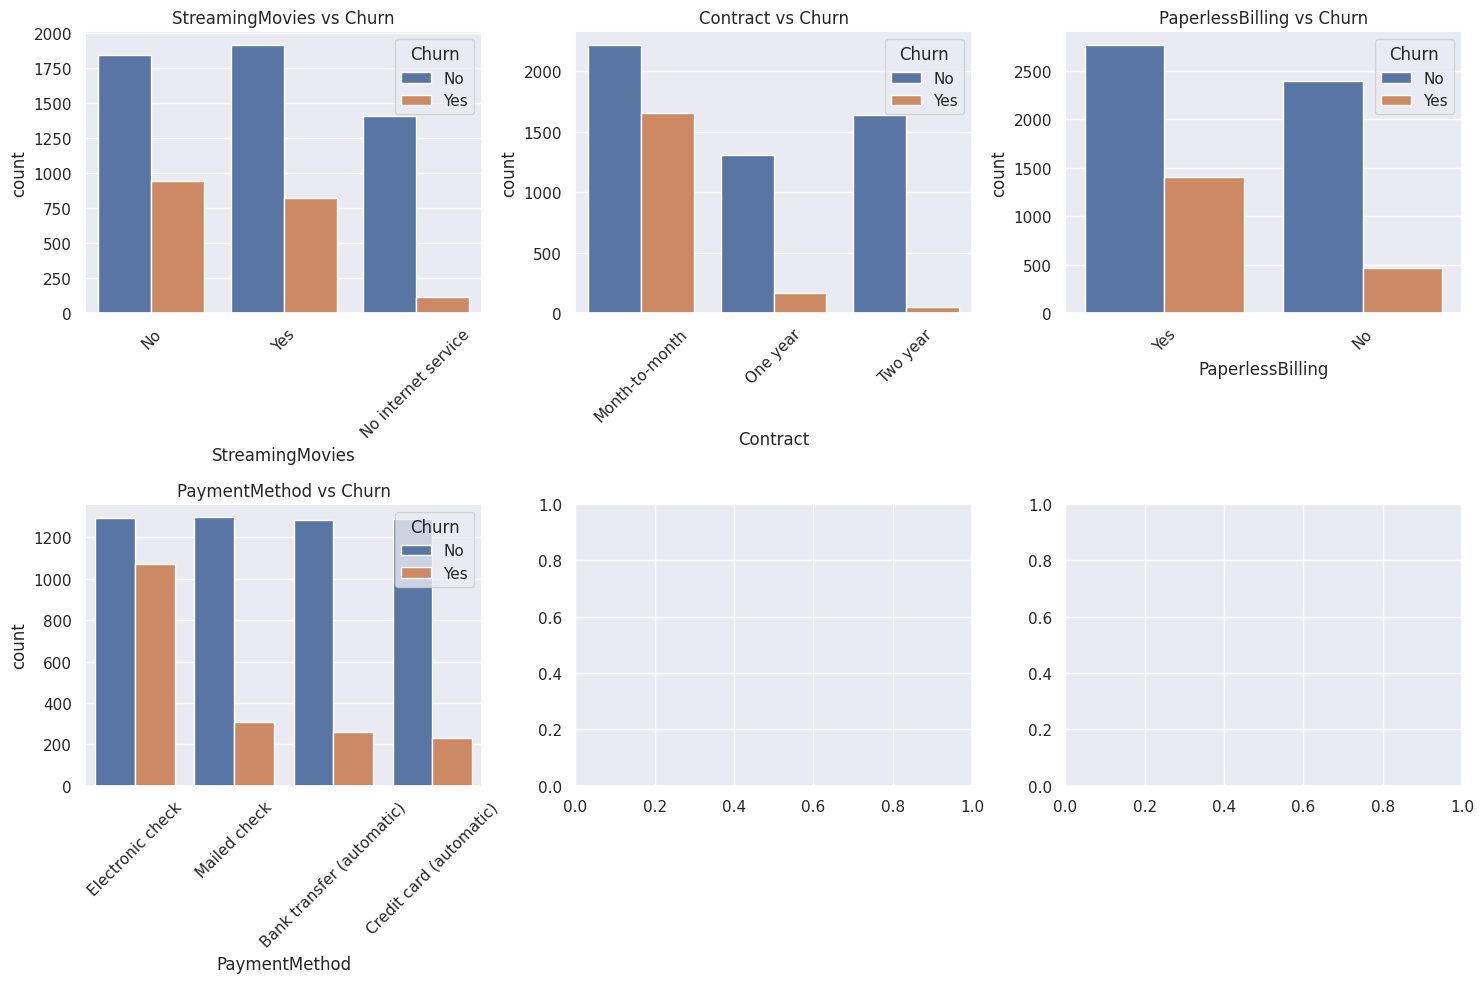

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for cat, ax in zip(kategorikal2, axes.flatten()):
    sns.countplot(x=cat, data=df, hue="Churn", ax=ax)
    ax.set_title(f"{cat} vs Churn")
    ax.legend(title="Churn", loc="upper right")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

**Kesimpulan sementara**

- Jenis Kelamin: Baik laki-laki maupun perempuan memiliki jumlah churn yang sama, yang menunjukkan bahwa jenis kelamin kemungkinan besar tidak mempengaruhi churn.

- Senior Citizen: Pelanggan yang lebih muda cenderung lebih mungkin untuk melakukan churn dibandingkan dengan pelanggan yang lebih tua.

- Partner: Pelanggan yang tidak memiliki pasangan (single) lebih mungkin untuk melakukan churn dibandingkan dengan yang memiliki pasangan.

- Dependents: Pelanggan yang tidak memiliki tanggungan lebih besar kemungkinannya untuk melakukan churn.

- Phone Service: Pelanggan yang memiliki layanan telepon lebih mungkin untuk melakukan churn.

- Multiple Lines: Pelanggan yang memiliki banyak saluran atau sedikit saluran telepon lebih mungkin untuk melakukan churn dibandingkan dengan pelanggan yang tidak memiliki saluran telepon sama sekali.

- Internet Service: Pelanggan yang menggunakan layanan fiber optic lebih besar kemungkinannya untuk melakukan churn dibandingkan dengan jenis layanan internet lainnya.

- Online Security: Pelanggan yang tidak memiliki layanan keamanan jaringan lebih besar kemungkinannya untuk melakukan churn.

- Online Backup: Pelanggan yang tidak memiliki layanan backup online lebih besar kemungkinannya untuk melakukan churn.

- Device Protection: Pelanggan yang tidak memiliki perlindungan perangkat lebih besar kemungkinannya untuk melakukan churn.

- Tech Support: Pelanggan yang tidak memiliki dukungan teknis lebih besar kemungkinannya untuk melakukan churn.

- Streaming TV: Pelanggan yang tidak memiliki layanan streaming TV dan yang memiliki layanan streaming TV sama-sama lebih mungkin untuk melakukan churn.

- Streaming Movies: Pelanggan yang tidak memiliki layanan streaming movie dan yang memiliki layanan streaming movie sama-sama lebih mungkin untuk melakukan churn.

- Contract: Pelanggan dengan kontrak bulanan lebih besar kemungkinannya untuk melakukan churn dibandingkan dengan jenis kontrak lainnya.

- Paperless Billing: Pelanggan yang menggunakan tagihan kertas lebih besar kemungkinannya untuk melakukan churn.

- Payment Method: Pelanggan yang menggunakan metode pembayaran elektronik (electronic check) lebih besar kemungkinannya untuk melakukan churn.

In [34]:
Numerikal.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

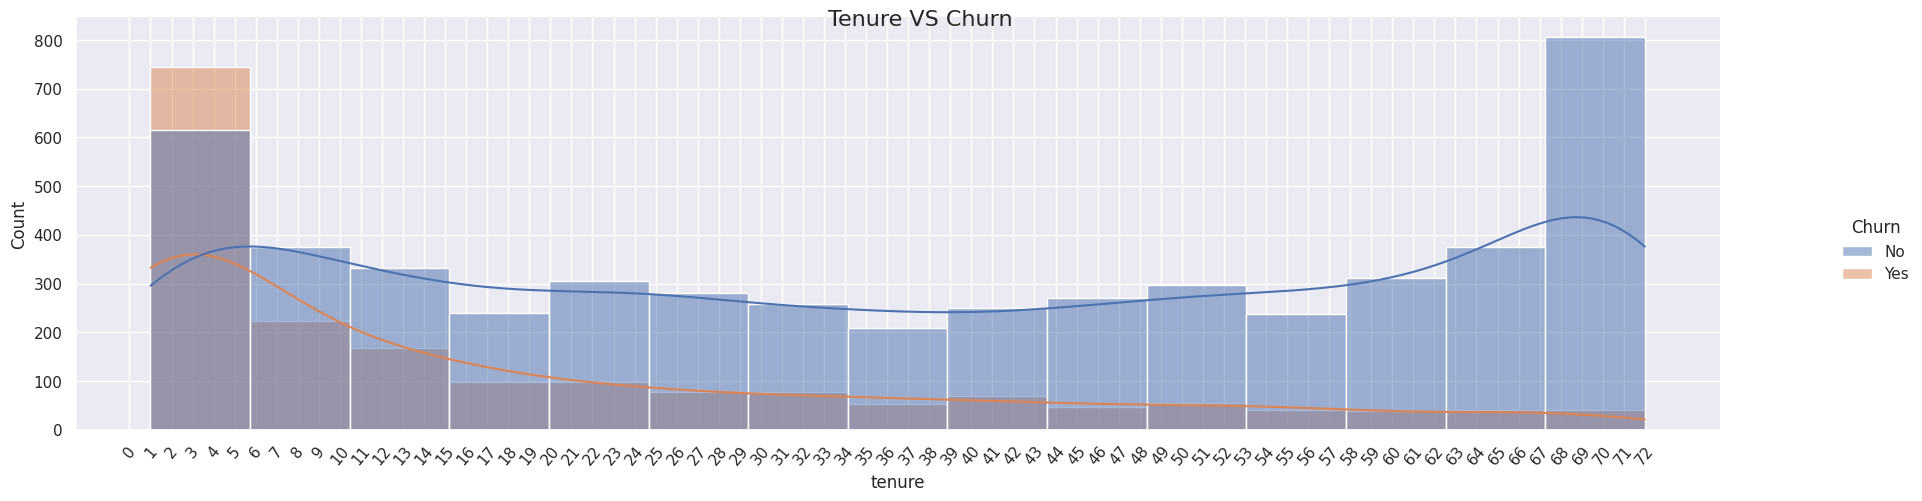

In [35]:
plot = sns.displot(df, x="tenure", hue="Churn", kde=True, height=5, aspect=2)
for ax in plot.axes.flat:
    ax.set_xticks(range(0, 73, 1))
    ax.set_xticklabels(range(0, 73, 1), rotation=50)
plot.fig.set_size_inches(20, 5)
plot.fig.suptitle("Tenure VS Churn", fontsize=16)

plt.show()

Dapat dilihat bahwa, individu yang Churn kebanyakan adalah yang tenurenya (jumlah bulan berlangganan) adalah paling tinggi di kisaran tahun pertama berlangganan (sekitaran 12 bulan pertama)

rekomendasi:
- pelanggan bisa diberikan berbagai benefit di awal masa mereka berlangganan

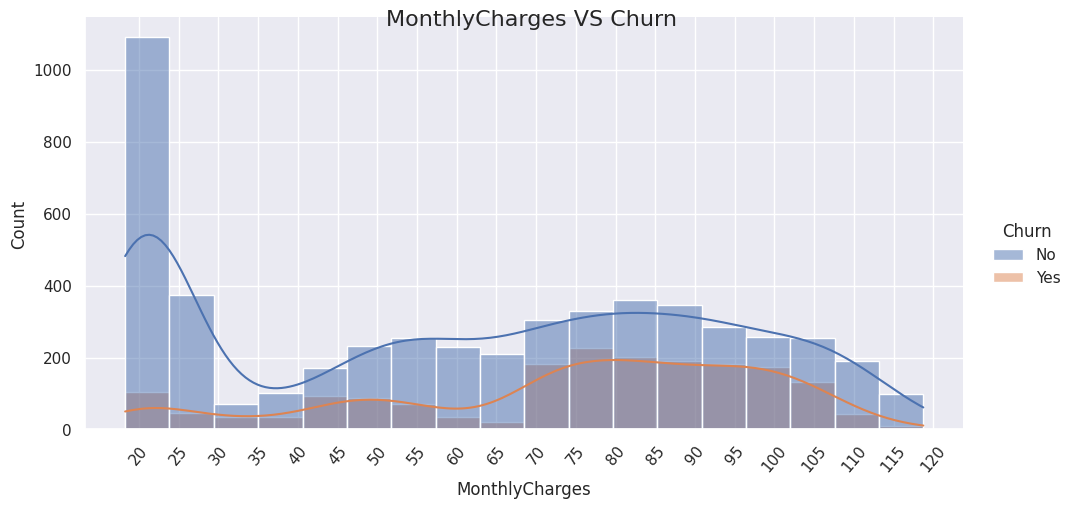

In [39]:
plot = sns.displot(df, x="MonthlyCharges", hue="Churn", kde=True, height=5, aspect=2)
for ax in plot.axes.flat:
    ax.set_xticks(range(20, 125, 5))
    ax.set_xticklabels(range(20, 125, 5), rotation=50)
plot.fig.suptitle("MonthlyCharges VS Churn", fontsize=16)

plt.show()

dapat dilihat bahwa individu dengan mothlycharges(biaya kepada pengguna) dengan kisaran 70-105 dolar, lebih besar kemungkinan individu tersebut untuk churn

rekomendasi:
- pengguna dengan monthlycharge yang besar kemungkinan besar tidak puas dengan pelayanan yang diberikan/merasa jikalau uang besar yang mereka keluarkan tidak sebanding dengan benefit yang didapatkan, maka bisa diberikan pelayan ekstra untuk pelanggan dengan monthly charges besar

In [38]:
df["TotalCharges"] = df["TotalCharges"]

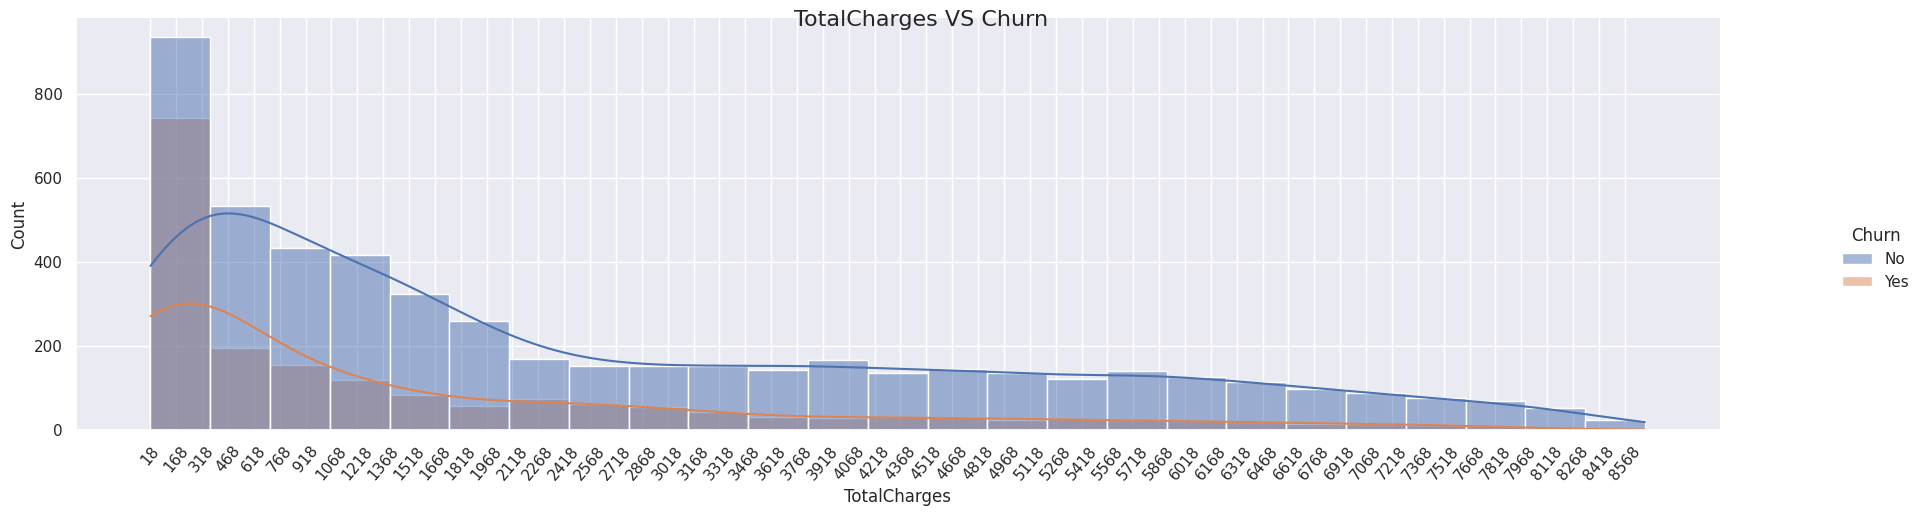

In [55]:
plot = sns.displot(df, x="TotalCharges", hue="Churn", kde=True, height=5, aspect=2)
for ax in plot.axes.flat:
    ax.set_xticks(range(18, 8690, 150))
    ax.set_xticklabels(range(18, 8690, 150), rotation=50)
plot.fig.set_size_inches(20, 5)
plot.fig.suptitle("TotalCharges VS Churn", fontsize=16)

plt.show()

dapat dilihat bahwa, individe dengan TotalCharge(total biaya pengguna) semakin besar, maka kemungkinan dia untuk melakukan churn tidak lah begitu tinggi

**BIAS**

biasa mungkin bisa terjadi dalam beberapa skenario dan kemungkinan

contoh:
- adanya imbalance data pada total charges, mungkin orang dengan total charges besar(diatas 2000 USD) itu hanya segelintir orang saja

contoh di bawah


In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [62]:
df.shape

(7032, 21)

In [63]:
df[df["TotalCharges"] < 2000]

# individu dendan total charges kurang dari 2000USD berjumlah 4176 dari total 7032

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [65]:
df[df["TotalCharges"] > 2000]

# individu dendan total charges lebih dari 2000USD berjumlah 2826 dari total 7032

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


Hipotesis awal yaitu "individe dengan TotalCharge(total biaya pengguna) semakin besar, maka kemungkinan dia untuk melakukan churn tidak lah begitu tinggi" bisa dibilang tepat

In [68]:
import os
df.to_csv("TelcoChurn_clean.csv", index=False)
print(os.listdir('.'))

['.config', 'drive', 'TelcoChurn_clean', 'TelcoChurn_clean.csv', 'sample_data']
